In [1]:
def switch_player(current_player, other_player):
    # k = current_player
    # current_player = other_player
    # other_player = k
    current_player, other_player = other_player, current_player
    return current_player, other_player



In [2]:
switch_player(1,2)

(2, 1)

In [3]:
import numpy as np

In [4]:
a = np.array([0, 8])
b = np.array([3, 12])

print(a-b)

[-3 -4]


In [5]:
48-36

12

In [7]:
nrows = 2
ncols = 6 
board_indices = list(np.ndindex(nrows, ncols))  # List of board indices for navigation
board_format = board_indices[5::-1] + board_indices[6:]
def action2pit(action):
    """Converts an action index into a board index."""
    return board_format[action]

In [8]:
actions = list(range(12))

In [9]:
def zero_row_exists(state):
    for i in [0, 1]:
        if np.sum(state[i,:], axis = None)==0 :
            # print(f"for row {i} , {np.sum(state[i,:], axis = None)==0=}")
            return True
    return False

In [10]:
def valid_moves(state):
    valid=[]
    for i in actions:
        pit_index = action2pit(i)
        if state[pit_index] != 0:
            if zero_row_exists(state) and state[pit_index]> 6-i%6:
                # print("zre")
                valid.append(i)
            elif not zero_row_exists(state):
                # print("nzre")
                valid.append(i)
    return valid

In [11]:
b = np.array([
    0, 0, 0, 0, 0, 0,
    0, 1, 3, 8, 4, 10
]).reshape((2, -1))

c = np.array([
    0, 1, 3, 8, 4, 10,
    0, 0, 0, 0, 0, 0
]).reshape((2, -1))

In [12]:
valid_moves(b)

[9, 10, 11]

In [13]:
def update_territories(self):
    
    if self.board.stores[0] > self.board.stores[1]:
        self.environment.games_won[0] +=1
        self.environment.win_list += [1]
        self.board.territory_count[0] +=1
        self.board.territory_count[1] -=1

    elif self.board.stores[0] < self.board.stores[1]:
        self.environment.games_won[1] +=1
        self.environment.win_list += [2]
        self.board.territory_count[1] +=1
        self.board.territory_count[0] -=1

In [14]:
nrows, ncols = 2, 6
board_indices = list(np.ndindex(nrows, ncols))  # List of board indices for navigation
player_territories = [board_indices[5::-1], board_indices[6:]]  # Define territories for each player


In [15]:
print(player_territories)

[[(0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)], [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]]


In [16]:
player_territories = [board_indices[5::-1], board_indices[6:]]  # Define territories for each player
player_territories[0].append((player_territories[1][-1]))
player_territories[1].pop(-1)

player_territories[1] .append ((player_territories[0][-1]))
player_territories[0].pop(-1)
player_territories

[[(0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]]

In [17]:
territory_count = [6, 6]
stores = [12, 28]
nrows, ncols = 2, 6
board_indices = list(np.ndindex(nrows, ncols))  # List of board indices for navigation
player_territories = [board_indices[5::-1], board_indices[6:]]  # Define territories for each player

territory_count = [6, 6]

def update_territories(stores, territory_count, player_territories):
    if stores[0] > stores[1]:
        territory_count[0] +=1
        territory_count[1] -=1
        player_territories[0].append((player_territories[1][-1]))
        player_territories[1].pop(-1)


    elif stores[0] < stores[1]:
        territory_count[1] +=1
        territory_count[0] -=1
        player_territories[1] .append ((player_territories[0][-1]))
        player_territories[0].pop(-1)
    

In [18]:
def update_territories(self):
    
    if self.board.stores[0] > self.board.stores[1]:
        self.environment.games_won[0] +=1
        self.environment.win_list += [1]
        self.board.territory_count[0] +=1
        self.board.territory_count[1] -=1
        self.board.player_territories[0].append((self.board.player_territories[1][-1]))
        self.board.player_territories[1].pop(-1)

    elif self.board.stores[0] < self.board.stores[1]:
        self.environment.games_won[1] +=1
        self.environment.win_list += [2]
        self.board.territory_count[1] +=1
        self.board.territory_count[0] -=1
        self.board.player_territories[1] .append ((self.board.player_territories[0][-1]))
        self.board.player_territories[0].pop(-1)

In [19]:
b = np.array([
    0, 0, 0, 0, 0, 0,
    0, 1, 3, 8, 4, 10
]).reshape((2, -1))

c = np.array([
    0, 1, 3, 8, 4, 10,
    0, 0, 0, 0, 0, 0
]).reshape((2, -1))

In [21]:
def zero_row_exists(state, board):
    for i in range(board.nrows):
        if np.sum(state[i,:], axis = None)==0 :
            return True
    return False

player_territories = [board_indices[5::-1], board_indices[6:]] 

def zero_row_exists(state, board):
    # for i in range(board.nrows):
    for t_list in board.player_territories:    
        if np.sum(state[t_list], axis = None)==0 :
            return True
    return False

def valid_moves(state, board):
    actions = board.actions
    valid=[]
    for i in actions:
        pit_index = board.action2pit(i)
        if state[pit_index] != 0:
            if zero_row_exists(state, board) and state[pit_index]> 6-i%6:
                valid.append(i)
            elif not zero_row_exists(state, board):
                valid.append(i)
    return valid

def possible_states(player, state, board):
    actions = board.actions
    player_id = player-1
    open_moves = []
    state = np.reshape(state, (2, -1))
    for i in actions:
        pit_index = board.action2pit(i)
        if pit_index in board.player_territories[player_id]:
            if i in valid_moves(state, board) :
                open_moves.append(i)
    return open_moves

In [78]:
player_territories = [board_indices[5::-1], board_indices[6:]] 
stores = [12, 28]
territory_count = [6, 6]

def update_territories(stores, territory_count, player_territories):
    if stores[0] > stores[1]:
        territory_count[0] +=1
        territory_count[1] -=1
        player_territories[0].append((player_territories[1][-1]))
        player_territories[1].pop(-1)
    elif stores[0] < stores[1]:
        territory_count[1] +=1
        territory_count[0] -=1
        player_territories[1] .append ((player_territories[0][-1]))
        player_territories[0].pop(-1)

def zero_row_exists(state, player_territories):
    for player_territory in player_territories:
        t_list = ([i[0] for i in player_territory], [i[1] for i in player_territory])
        print(f"{np.sum(state[t_list], axis = None)=}")
        if np.sum(state[t_list], axis = None)==0 :
            return True
        return False

In [82]:
b = np.array([
    1, 0, 0, 0, 0, 0,
    1, 1, 3, 8, 4, 10
]).reshape((2, -1))

c = np.array([
    0, 1, 3, 8, 4, 10,
    0, 0, 0, 0, 0, 0
]).reshape((2, -1))

In [83]:
# player_territories = [board_indices[5::-1], board_indices[6:]] 
# print(f"Original player territories: {player_territories}")

# stores = [20, 28]
# update_territories(stores, territory_count, player_territories)
print(f"Updated territories:         {player_territories}")


zero_row_exists(b, player_territories)

Updated territories:         [[(0, 5), (0, 4), (0, 3), (0, 2), (0, 1)], [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (0, 0)]]
np.sum(state[t_list], axis = None)=0


True

In [58]:
p = player_territories[0]
print(p)
t = ([i[0] for i in p], [i[1] for i in p])
t

[(0, 5), (0, 4), (0, 3), (0, 2)]


([0, 0, 0, 0], [5, 4, 3, 2])

In [60]:
c[t]

array([10,  4,  8,  3])

In [5]:
def zero_row_exists(state, board):
    for i in range(board.nrows):
        if np.sum(state[i,:], axis = None)==0 :
            return True
    return False
import numpy as np

In [10]:
a = list(np.array([[9, 0], [99,9]]))
print(a)

[array([9, 0]), array([99,  9])]


In [40]:
stores_list = [[1, 3], [1, 4], [1, 3], [1, 2]]
# stores_list=[]
stores = [1,2]
stores_list.append(stores)
stores_list = stores_list[-2:]
# stores_list = np.unique(np.array(stores_list))
# print(stores_list)

In [41]:
s = stores_list
s

[[1, 2], [1, 2]]

In [42]:
def update_stores_list(stores_list, stores):
    stores_list.append(stores)
    stores_list = stores_list[-2:]
    return stores_list

In [39]:
update_stores_list(stores_list, stores)

[[1, 2], [1, 2]]

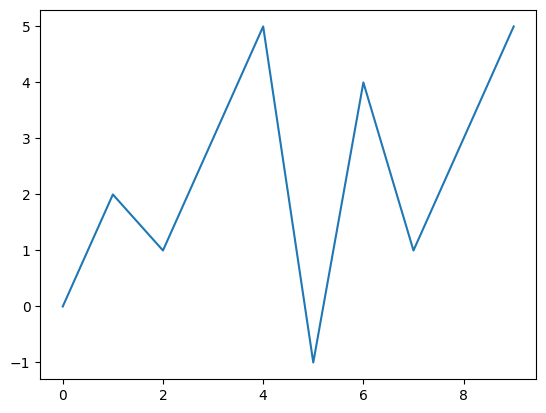

In [43]:
import matplotlib.pyplot as plt

plt.plot([0,2,1,3,5,-1,4,1,3,5])

In [ ]:
from env import DQNAgent, RandomAgent, GameController
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
import datetime
import tensorflow as tf

warnings.filterwarnings('ignore')

INVALID_ACTION_PENALTY = -1

# Set up separate log directories for each agent
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
learner_log_dir = 'logs/learner_' + current_time
random_log_dir = 'logs/random_' + current_time
learner_writer = tf.summary.create_file_writer(learner_log_dir)
random_writer = tf.summary.create_file_writer(random_log_dir)

# ... [rest of your imports and functions] ...

def train_agents(episodes, game_controller, save_weights_path, save_model_path):
    action_size = game_controller.action_space_size
    state_size = game_controller.state_space_size
    learning_agent = DQNAgent(state_size, action_size, 1)
    random_agent = RandomAgent(action_size, game_controller.board, 2)
    rewards_learner = []
    rewards_random = []

    for e in range(episodes):
        state = game_controller.reset_game()
        state = np.reshape(state, [1, state_size])
        done = False
        episode_reward_learner = 0
        episode_reward_random = 0

        while not done:
            # Learning agent's turn (DQN Agent)
            action1, penalty1 = dqn_act(state, learning_agent, game_controller.board)
            next_state, reward1, done, info = game_controller.step(action1, player=1)
            next_state = np.reshape(next_state, [1, state_size])
            learning_agent.remember(state, action1, reward1 + penalty1, next_state, done)
            state = next_state
            episode_reward_learner += reward1

            if done:
                break

            # Random agent's turn
            action2, penalty2 = random_agent.act(state, game_controller.board)
            next_state, reward2, done, info = game_controller.step(action2, player=2)
            next_state = np.reshape(next_state, [1, state_size])
            state = next_state
            episode_reward_random += reward2

            # Only train the learning agent
            if len(learning_agent.memory) > 32:
                learning_agent.replay(32)

        # Save the model weights after each episode
        learning_agent.save(save_weights_path.format(e+1))

        # Log the episode rewards for each agent
        with learner_writer.as_default():
            tf.summary.scalar('Episode Reward', episode_reward_learner, step=e)
        with random_writer.as_default():
            tf.summary.scalar('Episode Reward', episode_reward_random, step=e)
        tf.summary.flush()

        rewards_learner.append(episode_reward_learner)
        rewards_random.append(episode_reward_random)

        print(f"Episode: {e+1}/{episodes}, Epsilon: {learning_agent.epsilon:.2f}, Learner Reward: {episode_reward_learner}, Random Reward: {episode_reward_random}")

    print("Training completed and model weights saved for the learning agent.")
    plt.plot(rewards_learner, "r", label="DQN agent")
    plt.plot(rewards_random, "b", label="Random agent")
    plt.legend()
    plt.show()

game_controller = GameController()
train_agents(200, game_controller, './saved_weights/saved_weights_epoch_{}.h5', './saved_weights/saved_model_epoch_{}.json')


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: >

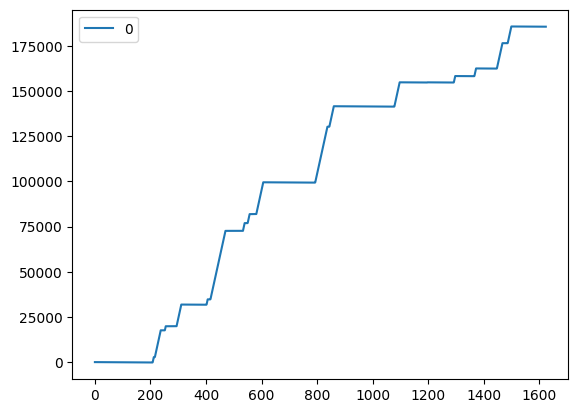

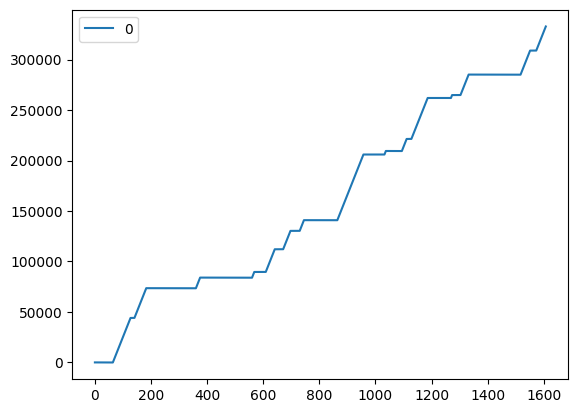

In [2]:
rewl = pd.read_csv("rewards_learner.csv", header=None)
rewr = pd.read_csv("rewards_random.csv", header=None)

rewl.cumsum().plot()
rewr.cumsum().plot()

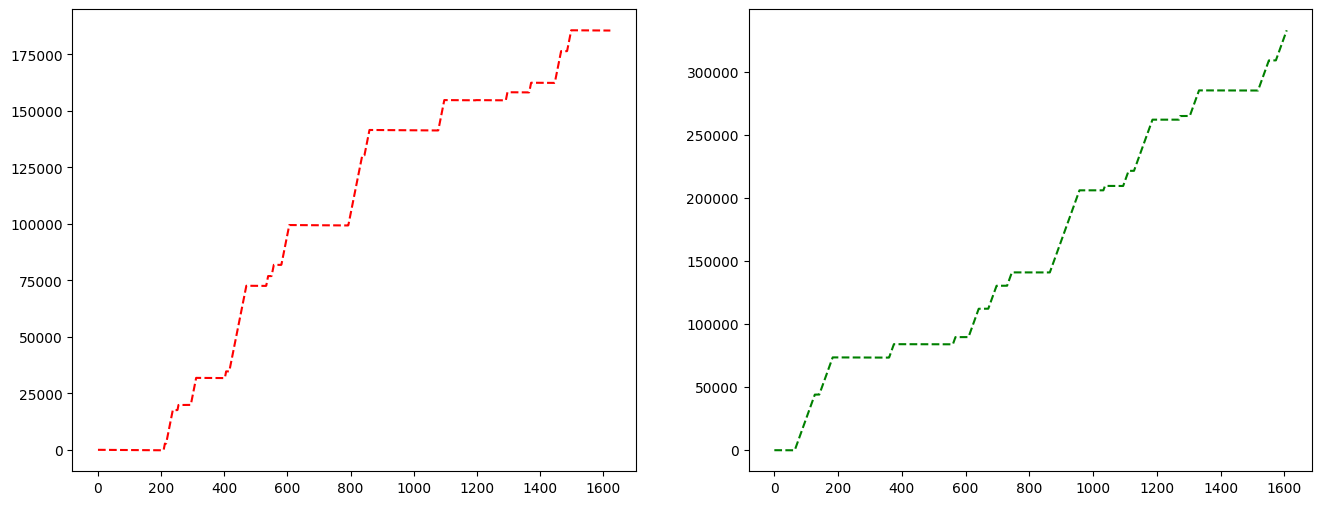

In [3]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(rewl.cumsum(), "r--")
plt.subplot(1, 2, 2)
plt.plot(rewr.cumsum(), "g--")
plt.show()

In [51]:
r = list(rewl)
r

[0]

In [4]:
r = list(np.squeeze(rewl.values))
r

[0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -

In [5]:
np.cumsum(np.array(r))

array([ 0.00000e+00, -1.00000e+00, -2.00000e+00, ...,  2.06278e+05,
        2.06277e+05,  2.06277e+05])

In [6]:
b = np.random.randint(low=0, high=12, size=(2,6))

In [7]:
bb = (b - np.min(b))/(np.max(b) - np.min(b))
bb

array([[0.09090909, 0.36363636, 0.54545455, 0.72727273, 0.27272727,
        0.        ],
       [0.90909091, 1.        , 0.36363636, 1.        , 0.        ,
        0.09090909]])

In [7]:
import h5py

# Open the HDF5 file
file_path = './saved_weights1/saved_weights_epoch_27.h5'
with h5py.File(file_path, 'r') as f:
    def print_attrs(name, obj):
        print(f"{name}:")
        for key, val in obj.attrs.items():
            print(f"  {key}: {val}")
            
    # Iterate through the file and print the datasets and their values
    for layer_name in f.keys():
        print(f"Layer: {layer_name}")
        layer = f[layer_name]
        for sub_layer_name in layer.keys():
            sub_layer = layer[sub_layer_name]
            for weight_name in sub_layer.keys():
                weight_data = sub_layer[weight_name][:]
                print(f"  {weight_name}: {weight_data}")

        # Printing the attributes (if any)
        layer.visititems(print_attrs)


Layer: dense
  bias:0: [ 0.          0.          0.00600459  0.         -0.00600426 -0.00599336
 -0.00600419  0.         -0.00600367  0.          0.          0.00599369
  0.0060038   0.0059864   0.00600389  0.00600425 -0.0059795   0.00600385
 -0.00599941  0.00600038  0.         -0.00599914 -0.0060038   0.
  0.          0.          0.          0.         -0.00600463  0.
  0.00600388  0.          0.         -0.00600416  0.00561123 -0.00600405
  0.          0.00600294  0.00600287  0.         -0.00600421 -0.00600448
  0.0059903  -0.00600237 -0.00600079  0.          0.          0.00599702
 -0.00600421  0.          0.          0.          0.         -0.0059964
 -0.00600371  0.          0.          0.          0.00600342 -0.00600327
  0.         -0.00599085 -0.00598389  0.          0.         -0.0059679
  0.          0.          0.          0.         -0.00599483  0.00600403
  0.         -0.00600258  0.00600449  0.          0.          0.
  0.          0.         -0.00599963 -0.00600025 -0.00

In [8]:
import os
import h5py
import numpy as np

def load_weights(file_path):
    weights = {}
    with h5py.File(file_path, 'r') as f:
        for layer_name in f.keys():
            layer = f[layer_name]
            layer_weights = {}
            for sub_layer_name in layer.keys():
                sub_layer = layer[sub_layer_name]
                for weight_name in sub_layer.keys():
                    weight_data = sub_layer[weight_name][:]
                    layer_weights[weight_name] = weight_data
            weights[layer_name] = layer_weights
    return weights

def compare_weights(weights1, weights2):
    differences = {}
    for layer in weights1.keys():
        if layer in weights2:
            layer_diff = {}
            for weight_name in weights1[layer]:
                if weight_name in weights2[layer]:
                    if not np.array_equal(weights1[layer][weight_name], weights2[layer][weight_name]):
                        layer_diff[weight_name] = {
                            "epoch1": weights1[layer][weight_name],
                            "epoch2": weights2[layer][weight_name]
                        }
            if layer_diff:
                differences[layer] = layer_diff
    return differences

def main():
    folder_path = 'saved_weights1'
    files = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
    files.sort()  # Ensure files are sorted by epoch

    all_weights = {}
    for file in files:
        file_path = os.path.join(folder_path, file)
        all_weights[file] = load_weights(file_path)

    for i in range(len(files) - 1):
        file1 = files[i]
        file2 = files[i + 1]
        weights1 = all_weights[file1]
        weights2 = all_weights[file2]

        differences = compare_weights(weights1, weights2)
        if differences:
            print(f"Differences between {file1} and {file2}:")
            for layer, layer_diff in differences.items():
                print(f"  Layer: {layer}")
                for weight_name, weight_diff in layer_diff.items():
                    print(f"    Weight: {weight_name}")
                    print(f"      Epoch 1: {weight_diff['epoch1']}")
                    print(f"      Epoch 2: {weight_diff['epoch2']}")
        else:
            print(f"No differences between {file1} and {file2}")

if __name__ == "__main__":
    main()


Differences between saved_weights_epoch_1.h5 and saved_weights_epoch_10.h5:
  Layer: dense
    Weight: bias:0
      Epoch 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
      Epoch 2: [-0.04549935 -0.02165669 -0.03156635 -0.02908843  0.0456682   0.
  0.01726274 -0.02579585 -0.02891801  0.          0.         -0.00965554
  0.04456158  0.03016377  0.         -0.03848076  0.00209243  0.00116674
  0.01692954  0.04483372 -0.02931496  0.          0.01456235  0.05701127
  0.05805574  0.          0.          0.03467665 -0.01359933  0.0470122
 -0.02664889  0.01153131 -0.01288224  0.          0.02211727  0.03574932
  0.01815645 -0.0532544  -0.01510447 -0.

In [9]:
import os
import h5py
import numpy as np
import pandas as pd

def load_weights(file_path):
    weights = {}
    with h5py.File(file_path, 'r') as f:
        for layer_name in f.keys():
            layer = f[layer_name]
            layer_weights = {}
            for sub_layer_name in layer.keys():
                sub_layer = layer[sub_layer_name]
                for weight_name in sub_layer.keys():
                    weight_data = sub_layer[weight_name][:]
                    layer_weights[weight_name] = weight_data
            weights[layer_name] = layer_weights
    return weights

def compare_weights(weights1, weights2):
    for layer in weights1.keys():
        if layer in weights2:
            for weight_name in weights1[layer]:
                if weight_name in weights2[layer]:
                    if not np.array_equal(weights1[layer][weight_name], weights2[layer][weight_name]):
                        return False
    return True

def calculate_similarity(weights1, weights2):
    total_elements = 0
    similar_elements = 0
    for layer in weights1.keys():
        if layer in weights2:
            for weight_name in weights1[layer]:
                if weight_name in weights2[layer]:
                    w1 = weights1[layer][weight_name]
                    w2 = weights2[layer][weight_name]
                    total_elements += w1.size
                    similar_elements += np.sum(np.isclose(w1, w2))
    return (similar_elements / total_elements) * 100 if total_elements > 0 else 0

def main():
    folder_path = 'saved_weights1'
    files = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
    files.sort()  # Ensure files are sorted by epoch

    all_weights = {}
    for file in files:
        file_path = os.path.join(folder_path, file)
        all_weights[file] = load_weights(file_path)

    comparison_df = pd.DataFrame(index=files, columns=files, dtype=bool)
    similarity_df = pd.DataFrame(index=files, columns=files, dtype=float)

    for i in range(len(files)):
        for j in range(i, len(files)):
            file1 = files[i]
            file2 = files[j]
            weights1 = all_weights[file1]
            weights2 = all_weights[file2]

            comparison_df.loc[file1, file2] = comparison_df.loc[file2, file1] = compare_weights(weights1, weights2)
            similarity_df.loc[file1, file2] = similarity_df.loc[file2, file1] = calculate_similarity(weights1, weights2)

    print("Comparison DataFrame (True/False if weights are the same):")
    print(comparison_df)
    print("\nSimilarity DataFrame (Percentage similarity):")
    print(similarity_df)

    # Save to CSV for further analysis if needed
    comparison_df.to_csv('weights_comparison.csv')
    similarity_df.to_csv('weights_similarity.csv')

if __name__ == "__main__":
    main()


Comparison DataFrame (True/False if weights are the same):
                           saved_weights_epoch_1.h5  \
saved_weights_epoch_1.h5                       True   
saved_weights_epoch_10.h5                     False   
saved_weights_epoch_11.h5                     False   
saved_weights_epoch_12.h5                     False   
saved_weights_epoch_13.h5                     False   
saved_weights_epoch_14.h5                     False   
saved_weights_epoch_15.h5                     False   
saved_weights_epoch_16.h5                     False   
saved_weights_epoch_17.h5                     False   
saved_weights_epoch_18.h5                     False   
saved_weights_epoch_19.h5                     False   
saved_weights_epoch_2.h5                      False   
saved_weights_epoch_20.h5                     False   
saved_weights_epoch_21.h5                     False   
saved_weights_epoch_22.h5                     False   
saved_weights_epoch_23.h5                     False   
saved_

In [10]:
import os
import h5py
import numpy as np
import pandas as pd

def load_weights(file_path):
    weights = {}
    with h5py.File(file_path, 'r') as f:
        for layer_name in f.keys():
            layer = f[layer_name]
            layer_weights = {}
            for sub_layer_name in layer.keys():
                sub_layer = layer[sub_layer_name]
                for weight_name in sub_layer.keys():
                    weight_data = sub_layer[weight_name][:]
                    layer_weights[weight_name] = weight_data
            weights[layer_name] = layer_weights
    return weights

def compare_weights(weights1, weights2, tol=1e-5):
    for layer in weights1.keys():
        if layer in weights2:
            for weight_name in weights1[layer]:
                if weight_name in weights2[layer]:
                    if not np.allclose(weights1[layer][weight_name], weights2[layer][weight_name], atol=tol):
                        return False
    return True

def calculate_similarity(weights1, weights2, tol=1e-5):
    total_elements = 0
    similar_elements = 0
    for layer in weights1.keys():
        if layer in weights2:
            for weight_name in weights1[layer]:
                if weight_name in weights2[layer]:
                    w1 = weights1[layer][weight_name]
                    w2 = weights2[layer][weight_name]
                    total_elements += w1.size
                    similar_elements += np.sum(np.isclose(w1, w2, atol=tol))
    return (similar_elements / total_elements) * 100 if total_elements > 0 else 0

def main():
    folder_path = 'saved_weights1'
    files = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
    files.sort()  # Ensure files are sorted by epoch

    all_weights = {}
    for file in files:
        file_path = os.path.join(folder_path, file)
        all_weights[file] = load_weights(file_path)

    comparison_df = pd.DataFrame(index=files, columns=files, dtype=bool)
    similarity_df = pd.DataFrame(index=files, columns=files, dtype=float)

    for i in range(len(files)):
        for j in range(i, len(files)):
            file1 = files[i]
            file2 = files[j]
            weights1 = all_weights[file1]
            weights2 = all_weights[file2]

            comparison_df.loc[file1, file2] = comparison_df.loc[file2, file1] = compare_weights(weights1, weights2)
            similarity_df.loc[file1, file2] = similarity_df.loc[file2, file1] = calculate_similarity(weights1, weights2)

    print("Comparison DataFrame (True/False if weights are the same):")
    print(comparison_df)
    print("\nSimilarity DataFrame (Percentage similarity):")
    print(similarity_df)

    # Save to CSV for further analysis if needed
    comparison_df.to_csv('weights_comparison.csv')
    similarity_df.to_csv('weights_similarity.csv')

if __name__ == "__main__":
    main()


Comparison DataFrame (True/False if weights are the same):
                           saved_weights_epoch_1.h5  \
saved_weights_epoch_1.h5                       True   
saved_weights_epoch_10.h5                     False   
saved_weights_epoch_11.h5                     False   
saved_weights_epoch_12.h5                     False   
saved_weights_epoch_13.h5                     False   
saved_weights_epoch_14.h5                     False   
saved_weights_epoch_15.h5                     False   
saved_weights_epoch_16.h5                     False   
saved_weights_epoch_17.h5                     False   
saved_weights_epoch_18.h5                     False   
saved_weights_epoch_19.h5                     False   
saved_weights_epoch_2.h5                      False   
saved_weights_epoch_20.h5                     False   
saved_weights_epoch_21.h5                     False   
saved_weights_epoch_22.h5                     False   
saved_weights_epoch_23.h5                     False   
saved_

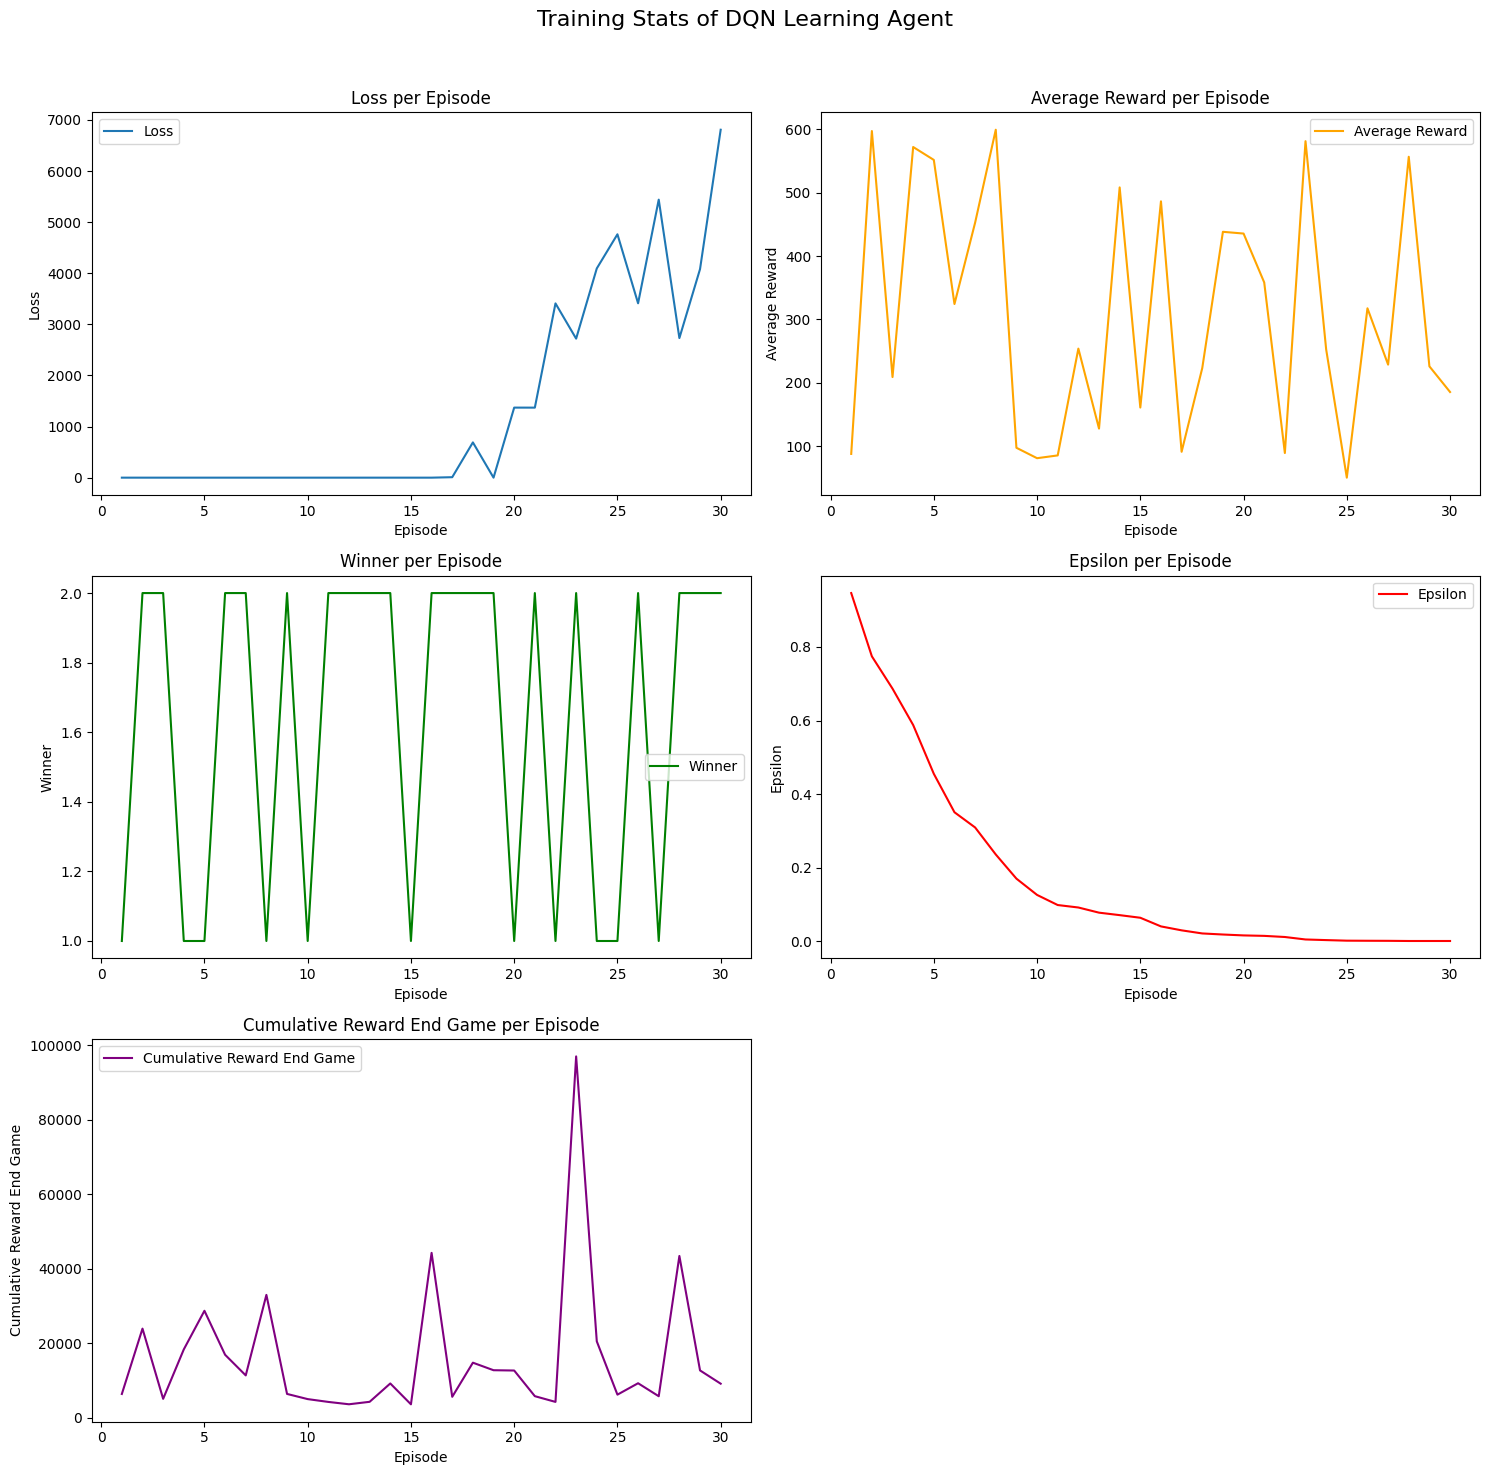

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = {
    "Episode": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    "Loss": [0.06880135099830416, 0.004532642621779814, 0.004988896764795451, 0.004802217313287353, 0.0039500809742700465, 0.004914067609449072, 0.0044498702176497314, 0.004927359705349469, 0.005021355185211481, 0.004038695942775424, 0.0035531448089993014, 0.005742630856063139, 0.004353652150469619, 0.007637929828888446, 0.0068441371786320815, 0.006862365971270871, 9.08341945846314, 689.8744051732356, 0.007195280504371719, 1370.6513504667125, 1370.113933826705, 3409.6278801323515, 2720.279354858542, 4093.646628358449, 4761.5974496282415, 3411.626501268207, 5439.9660304881145, 2731.2466898974512, 4080.743618812972, 6807.580805149835],
    "Average Reward": [87.81944444444444, 597.125, 209.04166666666666, 571.9375, 551.5769230769231, 324.25, 452.6, 599.2, 97.47692307692307, 81.04918032786885, 85.42857142857143, 253.92857142857142, 127.78787878787878, 508.22222222222223, 160.95454545454547, 486.2307692307692, 91.18032786885246, 223.22727272727272, 438.17241379310343, 435.41379310344826, 358.3125, 89.19148936170212, 581.1437125748503, 252.69135802469137, 50.34426229508197, 317.51724137931035, 228.64, 556.5512820512821, 225.94642857142858, 185.44897959183675],
    "Winner": [1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2],
    "Epsilon": [0.946354579813443, 0.7744209942832988, 0.6866430931872001, 0.5878229785513479, 0.45522245551230495, 0.3507711574848344, 0.30945741577570285, 0.23607350863684065, 0.17043057265153258, 0.1261630989318213, 0.09868776295209031, 0.09199970504166631, 0.07797369223798889, 0.0712465030521374, 0.06412808167716157, 0.04063952250178857, 0.029933432588273214, 0.021502049198442223, 0.018592988164936427, 0.01615829206087557, 0.014912990653247866, 0.01184203826198843, 0.005127208097935121, 0.0034334237278812784, 0.0018720617695792596, 0.0016187862842551224, 0.001435302541686172, 0.0009954703940636294, 0.0009954703940636294, 0.0009954703940636294],
    "Cumulative Reward End Game": [6323, 23885, 5017, 18302, 28682, 16861, 11315, 32956, 6336, 4944, 4186, 3555, 4217, 9148, 3541, 44247, 5562, 14733, 12707, 12627, 5733, 4192, 97051, 20468, 6142, 9208, 5716, 43411, 12653, 9087]
}

df = pd.DataFrame(data)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Training Stats of DQN Learning Agent', fontsize=16)

# Episode vs Loss
axs[0, 0].plot(df['Episode'], df['Loss'], label='Loss')
axs[0, 0].set_title('Loss per Episode')
axs[0, 0].set_xlabel('Episode')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Episode vs Average Reward
axs[0, 1].plot(df['Episode'], df['Average Reward'], label='Average Reward', color='orange')
axs[0, 1].set_title('Average Reward per Episode')
axs[0, 1].set_xlabel('Episode')
axs[0, 1].set_ylabel('Average Reward')
axs[0, 1].legend()

# Episode vs Winner
axs[1, 0].plot(df['Episode'], df['Winner'], label='Winner', color='green')
axs[1, 0].set_title('Winner per Episode')
axs[1, 0].set_xlabel('Episode')
axs[1, 0].set_ylabel('Winner')
axs[1, 0].legend()

# Episode vs Epsilon
axs[1, 1].plot(df['Episode'], df['Epsilon'], label='Epsilon', color='red')
axs[1, 1].set_title('Epsilon per Episode')
axs[1, 1].set_xlabel('Episode')
axs[1, 1].set_ylabel('Epsilon')
axs[1, 1].legend()

# Episode vs Cumulative Reward End Game
axs[2, 0].plot(df['Episode'], df['Cumulative Reward End Game'], label='Cumulative Reward End Game', color='purple')
axs[2, 0].set_title('Cumulative Reward End Game per Episode')
axs[2, 0].set_xlabel('Episode')
axs[2, 0].set_ylabel('Cumulative Reward End Game')
axs[2, 0].legend()

# Hide the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


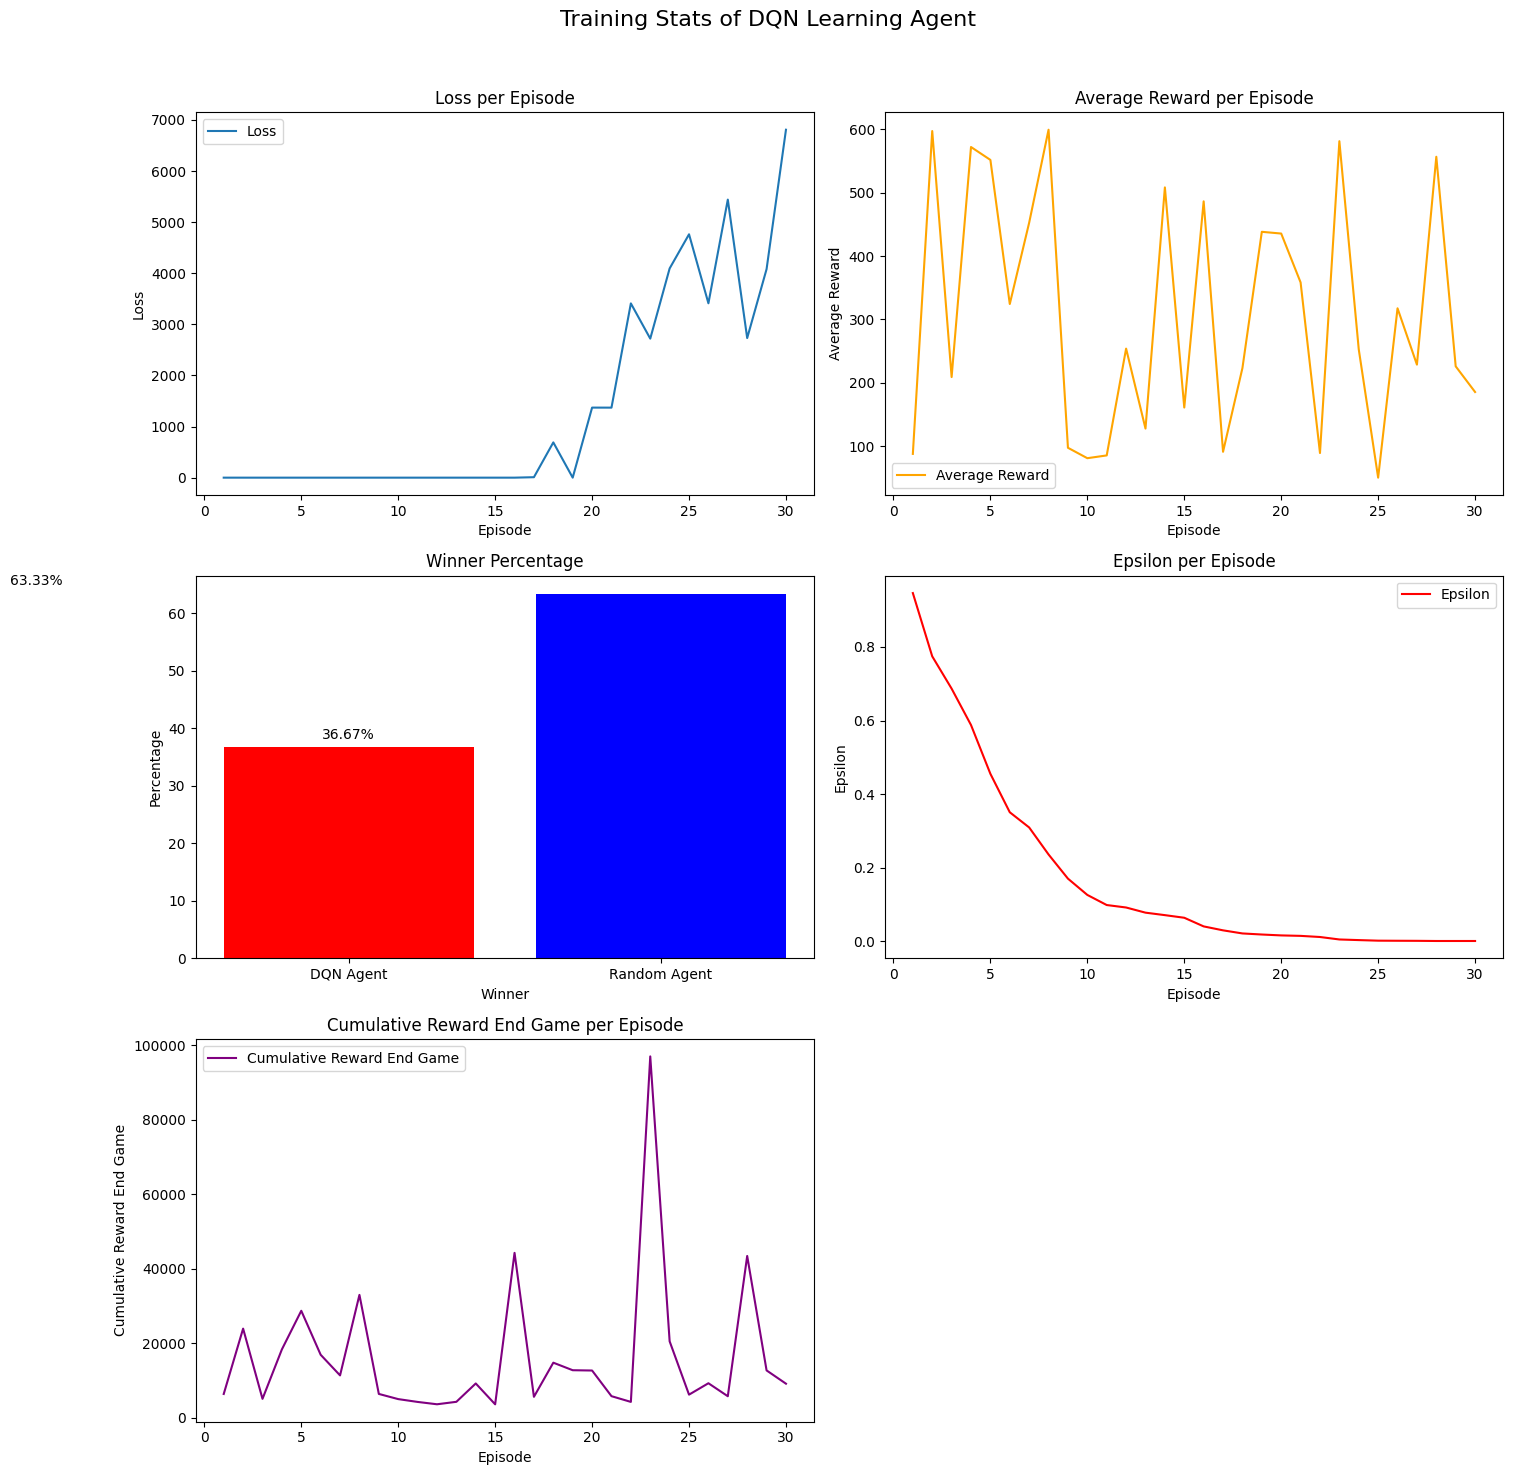

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = {
    "Episode": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    "Loss": [0.06880135099830416, 0.004532642621779814, 0.004988896764795451, 0.004802217313287353, 0.0039500809742700465, 0.004914067609449072, 0.0044498702176497314, 0.004927359705349469, 0.005021355185211481, 0.004038695942775424, 0.0035531448089993014, 0.005742630856063139, 0.004353652150469619, 0.007637929828888446, 0.0068441371786320815, 0.006862365971270871, 9.08341945846314, 689.8744051732356, 0.007195280504371719, 1370.6513504667125, 1370.113933826705, 3409.6278801323515, 2720.279354858542, 4093.646628358449, 4761.5974496282415, 3411.626501268207, 5439.9660304881145, 2731.2466898974512, 4080.743618812972, 6807.580805149835],
    "Average Reward": [87.81944444444444, 597.125, 209.04166666666666, 571.9375, 551.5769230769231, 324.25, 452.6, 599.2, 97.47692307692307, 81.04918032786885, 85.42857142857143, 253.92857142857142, 127.78787878787878, 508.22222222222223, 160.95454545454547, 486.2307692307692, 91.18032786885246, 223.22727272727272, 438.17241379310343, 435.41379310344826, 358.3125, 89.19148936170212, 581.1437125748503, 252.69135802469137, 50.34426229508197, 317.51724137931035, 228.64, 556.5512820512821, 225.94642857142858, 185.44897959183675],
    "Winner": [1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2],
    "Epsilon": [0.946354579813443, 0.7744209942832988, 0.6866430931872001, 0.5878229785513479, 0.45522245551230495, 0.3507711574848344, 0.30945741577570285, 0.23607350863684065, 0.17043057265153258, 0.1261630989318213, 0.09868776295209031, 0.09199970504166631, 0.07797369223798889, 0.0712465030521374, 0.06412808167716157, 0.04063952250178857, 0.029933432588273214, 0.021502049198442223, 0.018592988164936427, 0.01615829206087557, 0.014912990653247866, 0.01184203826198843, 0.005127208097935121, 0.0034334237278812784, 0.0018720617695792596, 0.0016187862842551224, 0.001435302541686172, 0.0009954703940636294, 0.0009954703940636294, 0.0009954703940636294],
    "Cumulative Reward End Game": [6323, 23885, 5017, 18302, 28682, 16861, 11315, 32956, 6336, 4944, 4186, 3555, 4217, 9148, 3541, 44247, 5562, 14733, 12707, 12627, 5733, 4192, 97051, 20468, 6142, 9208, 5716, 43411, 12653, 9087]
}

df = pd.DataFrame(data)

# Calculate percentage occurrence of winners
winner_counts = df['Winner'].value_counts(normalize=True) * 100

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Training Stats of DQN Learning Agent', fontsize=16)

# Episode vs Loss
axs[0, 0].plot(df['Episode'], df['Loss'], label='Loss')
axs[0, 0].set_title('Loss per Episode')
axs[0, 0].set_xlabel('Episode')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Episode vs Average Reward
axs[0, 1].plot(df['Episode'], df['Average Reward'], label='Average Reward', color='orange')
axs[0, 1].set_title('Average Reward per Episode')
axs[0, 1].set_xlabel('Episode')
axs[0, 1].set_ylabel('Average Reward')
axs[0, 1].legend()

# Winner bar plot with percentage annotations
axs[1, 0].bar(winner_counts.index, winner_counts.values, color=['blue', 'red'])
for i, value in enumerate(winner_counts.values):
    axs[1, 0].text(i, value + 1, f"{value:.2f}%", ha='center', va='bottom')
axs[1, 0].set_title('Winner Percentage')
axs[1, 0].set_xlabel('Winner')
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_xticks([1, 2])
axs[1, 0].set_xticklabels(['DQN Agent', 'Random Agent'])

# Episode vs Epsilon
axs[1, 1].plot(df['Episode'], df['Epsilon'], label='Epsilon', color='red')
axs[1, 1].set_title('Epsilon per Episode')
axs[1, 1].set_xlabel('Episode')
axs[1, 1].set_ylabel('Epsilon')
axs[1, 1].legend()

# Episode vs Cumulative Reward End Game
axs[2, 0].plot(df['Episode'], df['Cumulative Reward End Game'], label='Cumulative Reward End Game', color='purple')
axs[2, 0].set_title('Cumulative Reward End Game per Episode')
axs[2, 0].set_xlabel('Episode')
axs[2, 0].set_ylabel('Cumulative Reward End Game')
axs[2, 0].legend()

# Hide the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


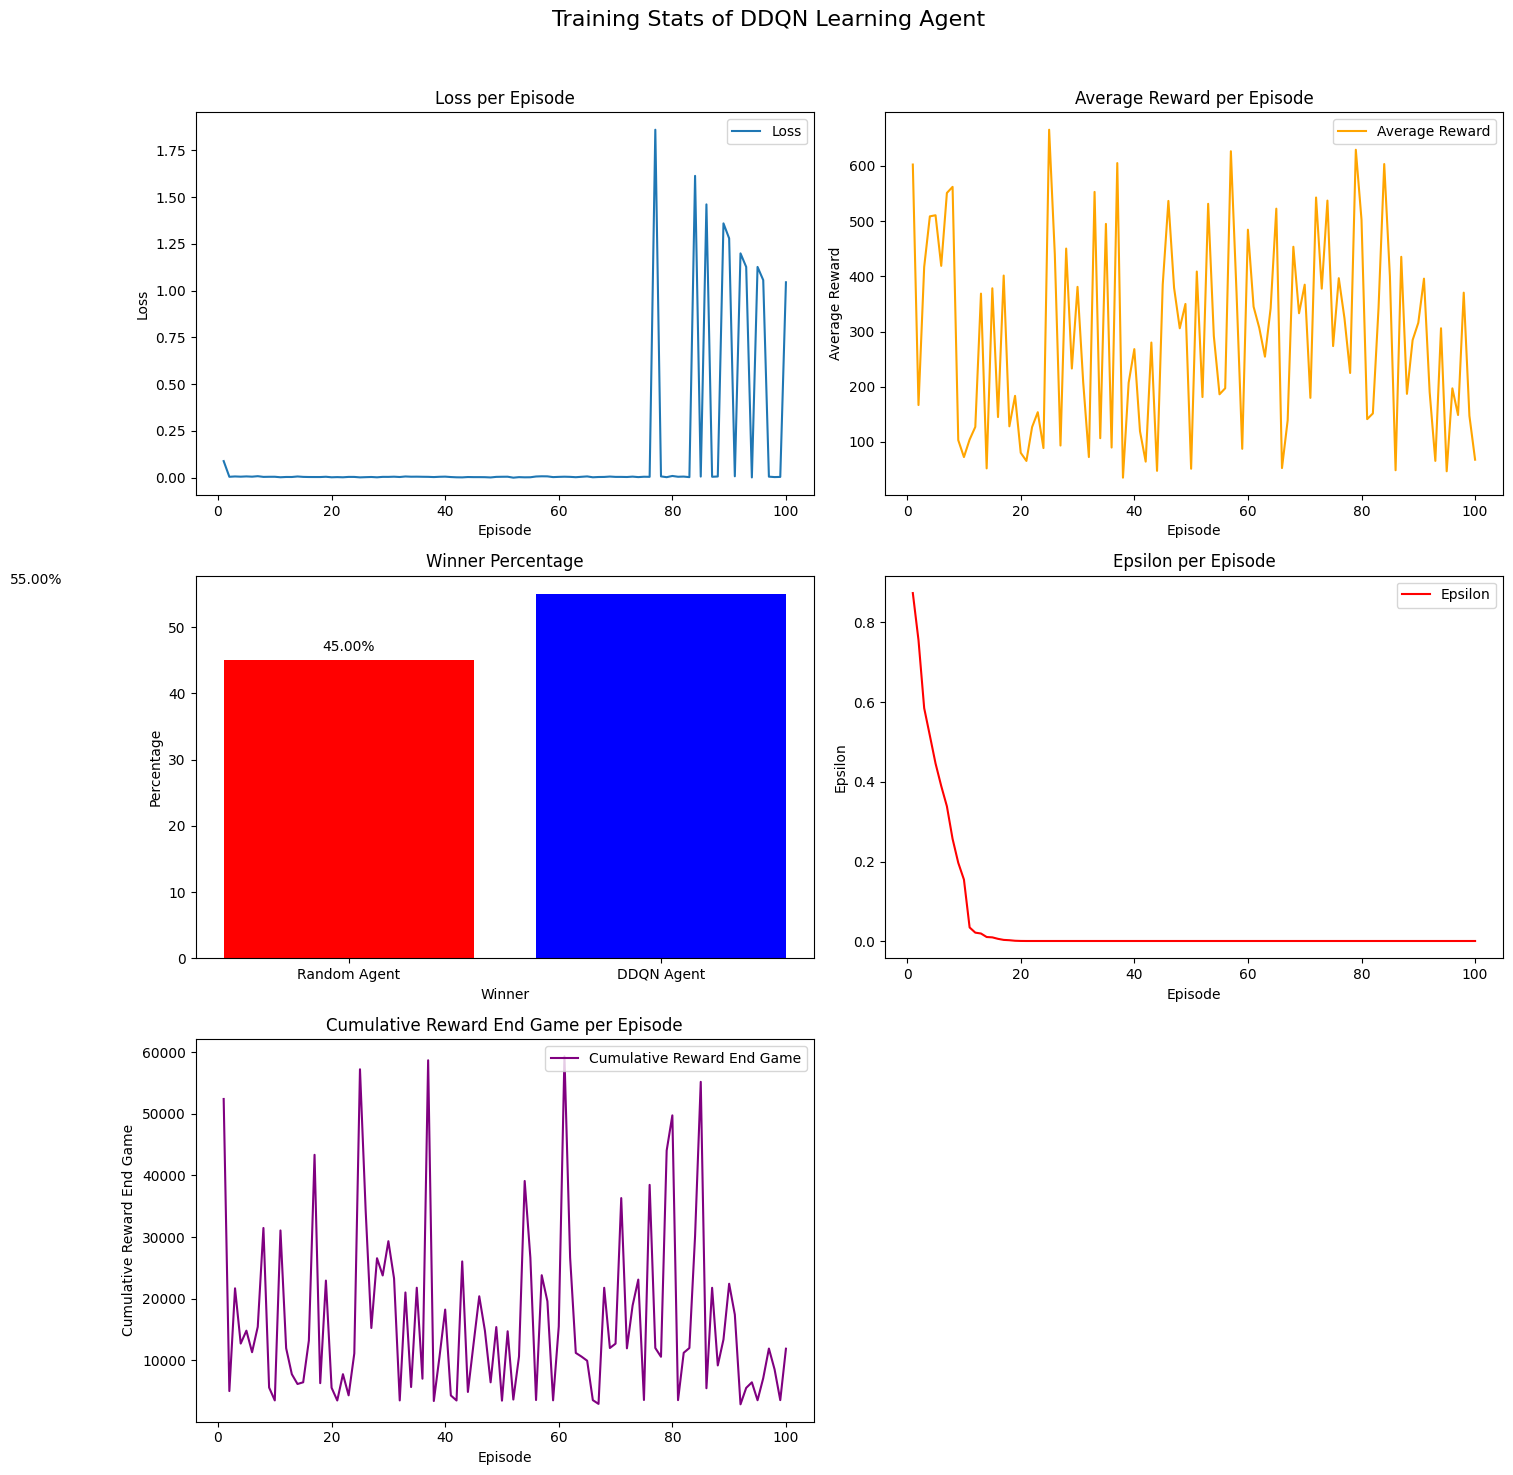

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'training_data_ddqn.csv'
df = pd.read_csv(file_path)

# Calculate percentage occurrence of winners
winner_counts = df['Winner'].value_counts(normalize=True) * 100

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Training Stats of DDQN Learning Agent', fontsize=16)

# Episode vs Loss
axs[0, 0].plot(df['Episode'], df['Loss'], label='Loss')
axs[0, 0].set_title('Loss per Episode')
axs[0, 0].set_xlabel('Episode')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Episode vs Average Reward
axs[0, 1].plot(df['Episode'], df['Average Reward'], label='Average Reward', color='orange')
axs[0, 1].set_title('Average Reward per Episode')
axs[0, 1].set_xlabel('Episode')
axs[0, 1].set_ylabel('Average Reward')
axs[0, 1].legend()

# Winner bar plot with percentage annotations
axs[1, 0].bar(winner_counts.index, winner_counts.values, color=['blue', 'red'])
for i, value in enumerate(winner_counts.values):
    axs[1, 0].text(i, value + 1, f"{value:.2f}%", ha='center', va='bottom')
axs[1, 0].set_title('Winner Percentage')
axs[1, 0].set_xlabel('Winner')
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_xticks([1, 2])
axs[1, 0].set_xticklabels(['Random Agent', 'DDQN Agent'])

# Episode vs Epsilon
axs[1, 1].plot(df['Episode'], df['Epsilon'], label='Epsilon', color='red')
axs[1, 1].set_title('Epsilon per Episode')
axs[1, 1].set_xlabel('Episode')
axs[1, 1].set_ylabel('Epsilon')
axs[1, 1].legend()

# Episode vs Cumulative Reward End Game
axs[2, 0].plot(df['Episode'], df['Cumulative Reward End Game'], label='Cumulative Reward End Game', color='purple')
axs[2, 0].set_title('Cumulative Reward End Game per Episode')
axs[2, 0].set_xlabel('Episode')
axs[2, 0].set_ylabel('Cumulative Reward End Game')
axs[2, 0].legend()

# Hide the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
